In [1]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [2]:
target1 = pd.read_csv('J081710.54+235223.9.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

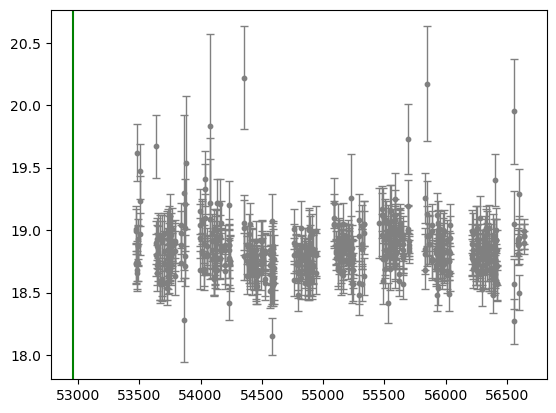

In [3]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 52962, color ='g')	
#plt.axvline(x= , color ='g')	

In [4]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

593

In [5]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.007299999997485429,
 0.007320000004256144,
 0.007339999996474944,
 10.067829999999958,
 0.008600000001024455,
 0.00864000000001397,
 0.00864000000001397,
 9.908929999997781,
 0.006580000001122244,
 0.006540000002132729,
 0.006529999998747371,
 15.9942499999961,
 0.0053600000028382055,
 0.0053600000028382055,
 130.2792999999947,
 0.00487000000430271,
 0.004849999997531995,
 7.998850000003586,
 0.004919999999401625,
 0.004909999996016268,
 0.004930000002786983,
 10.947910000002594,
 0.004899999999906868,
 0.004859999993641395,
 0.00494000000617234,
 15.963980000000447,
 0.006429999993997626,
 0.006540000002132729,
 0.006520000002637971,
 16.93764999999985,
 0.0073999999949592166,
 0.007460000000719447,
 0.007480000000214204,
 12.012950000003912,
 0.010709999995015096,
 0.010740000005171169,
 0.010719999998400453,
 25.03693000000203,
 0.007910000000265427,
 0.00789000000077067,
 0.00789999999688007,
 5.868000000002212,
 0.00878999999986263,
 0.008770000000367872,
 0.008620000000519212,

In [6]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

9


[14, 87, 151, 227, 287, 354, 437, 500, 576]

In [7]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[15, 73, 64, 76, 60, 67, 83, 63, 76, 17]

In [8]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [9]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
0,J081710.54+235223.9,1123041034521,19.01,0.18,124.29405,23.87319,53470.13732,0
1,J081710.54+235223.9,1123041034521,18.73,0.16,124.29392,23.87327,53470.14462,0
2,J081710.54+235223.9,1123041034521,18.99,0.18,124.29403,23.87329,53470.15194,0
3,J081710.54+235223.9,1123041034521,18.74,0.16,124.29397,23.87327,53470.15928,0
4,J081710.54+235223.9,1123041034521,19.62,0.23,124.29402,23.87339,53480.22711,0
...,...,...,...,...,...,...,...,...
505,J081710.54+235223.9,1123041034521,18.50,0.14,124.29379,23.87337,56596.40841,0
589,J081710.54+235223.9,2124106001671,18.95,0.10,124.29396,23.87341,56640.32346,0
590,J081710.54+235223.9,2124106001671,18.90,0.09,124.29394,23.87341,56640.33092,0
591,J081710.54+235223.9,2124106001671,18.99,0.10,124.29396,23.87340,56640.33838,0


In [11]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53506.18654

In [12]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

53885.15036

In [13]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54244.14078

In [14]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54600.15141

In [15]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

54939.14362

In [16]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55337.17469

In [17]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55704.16233

In [18]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56036.18185

In [19]:
df_9 = data.iloc[seppt[7]+1:seppt[8],:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56420.15056

In [21]:
df_10 = data.iloc[seppt[8]+1:,:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

56640.34583

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [22]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [23]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

In [ ]:


g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [24]:
med

[18.875,
 18.814999999999998,
 18.86,
 18.76,
 18.78,
 18.86,
 18.895,
 18.83,
 18.8,
 18.92]

In [25]:
centerMJD

[53483.89981071428,
 53739.795469722216,
 54115.09654174604,
 54477.1367948,
 54851.010274745764,
 55194.00741878788,
 55580.9055104878,
 55942.92864822581,
 56323.2466328,
 56595.673039375]

In [26]:
medMJD


[53480.24867,
 53740.29473,
 54115.22054,
 54464.32726,
 54857.38147,
 55184.374005000005,
 55590.229244999995,
 55948.377855,
 56329.23939,
 56591.930215]

In [27]:
medopflux


[0.00010233038430902948,
 0.0001081445418623452,
 0.00010375284158180084,
 0.00011376272858234333,
 0.00011168632477805658,
 0.00010375284158180084,
 0.00010046264430383397,
 0.00010665961212302547,
 0.00010964781961431828,
 9.817895843348643e-05]

In [28]:
st = 53470
#start of observations

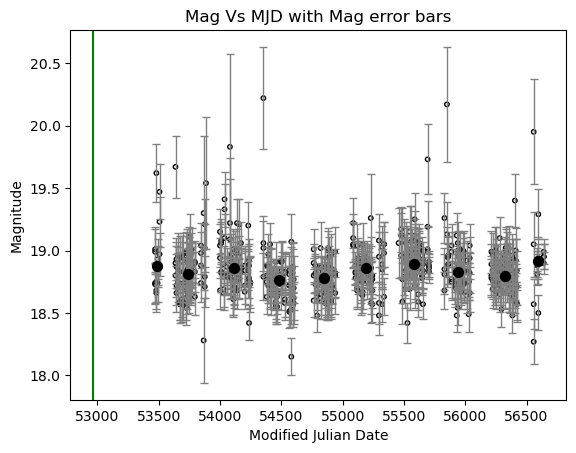

In [30]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 52962 , color ='g')	
#plt.axvline(x=  , color ='g')	

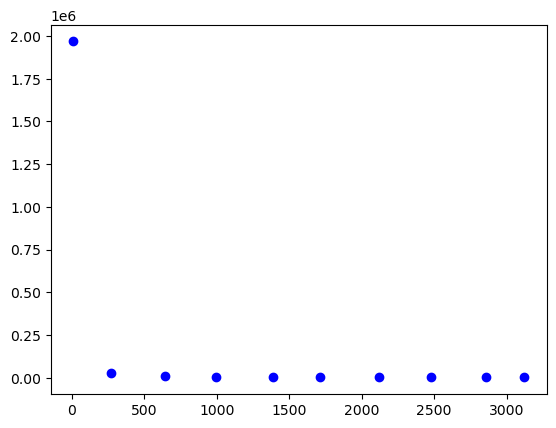

In [31]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [72]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000) #bounds= ([-10 ** 3, -10, -100],[10**3,10,100]))


In [73]:
popt3

array([-3.43273642e+01,  6.97950439e-05,  5.31830340e+01])

In [74]:
pcov3

array([[ 5.08381211e+12,  1.03322738e+07, -5.08381256e+12],
       [ 1.03322738e+07,  2.09991794e+01, -1.03322747e+07],
       [-5.08381256e+12, -1.03322747e+07,  5.08381301e+12]])

In [75]:
 np.sqrt(np.diag(pcov3))

array([2.25473105e+06, 4.58248616e+00, 2.25473125e+06])

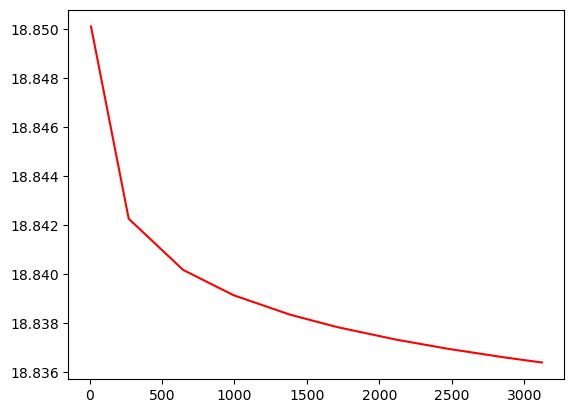

In [36]:
plt.plot(x, f(x,*popt3), 'r-')

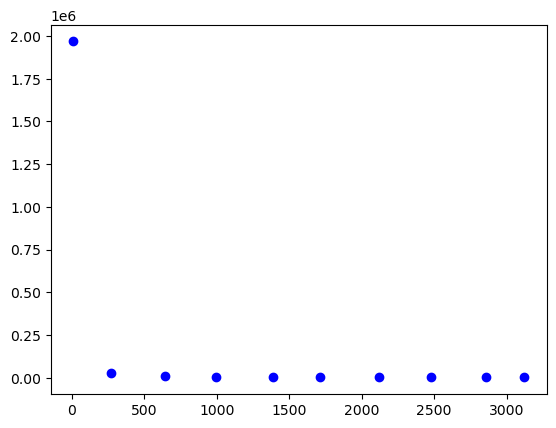

In [37]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [38]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [39]:
popt4

array([-1.53829504e+01,  3.41868001e-04,  3.42638641e+01])

In [40]:
pcov4

array([[ 1.00204706e+09,  2.26059395e+04, -1.00204808e+09],
       [ 2.26059395e+04,  5.09984738e-01, -2.26059626e+04],
       [-1.00204808e+09, -2.26059626e+04,  1.00204911e+09]])

In [41]:
 np.sqrt(np.diag(pcov4))

array([3.16551269e+04, 7.14132157e-01, 3.16551592e+04])

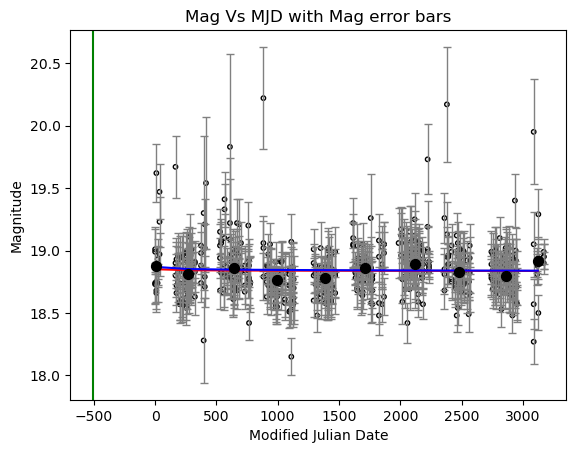

In [42]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x=52962  -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



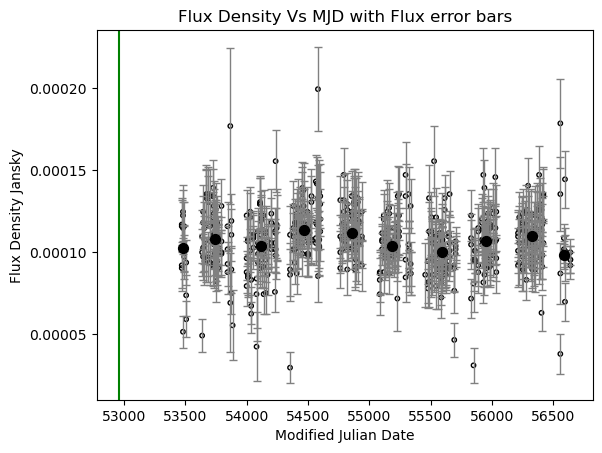

In [43]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x=52962  , color ='g')	
#plt.axvline(x= , color ='g')

In [44]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [45]:
popt2

array([ 3.78144061e-03,  6.59886123e-05, -3.67728660e-03])

In [46]:
pcov2

array([[ 6.00262325e+04, -1.04714681e+03, -6.00262353e+04],
       [-1.04714681e+03,  1.82672875e+01,  1.04714686e+03],
       [-6.00262353e+04,  1.04714686e+03,  6.00262381e+04]])

In [47]:
 np.sqrt(np.diag(pcov2))

array([245.00251523,   4.27402474, 245.0025267 ])

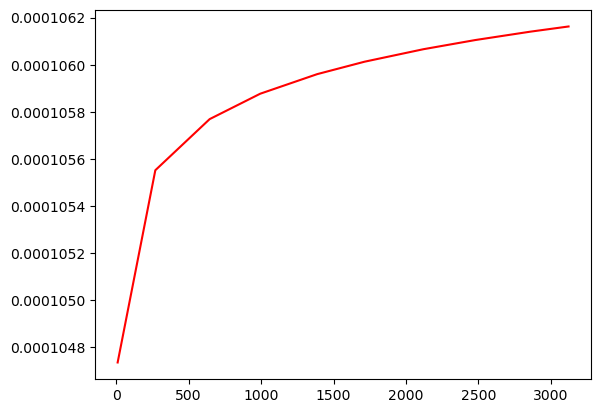

In [48]:
plt.plot(x, f(x,*popt2), 'r-')

In [49]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [50]:
popt1

array([ 0.00312298,  0.0001075 , -0.00301836])

In [51]:
pcov1

array([[ 682.89174885,  -24.667663  , -682.89182246],
       [ -24.667663  ,    0.89105429,   24.66766566],
       [-682.89182246,   24.66766566,  682.89189607]])

In [52]:
 np.sqrt(np.diag(pcov1))

array([26.13219755,  0.94395672, 26.13220037])

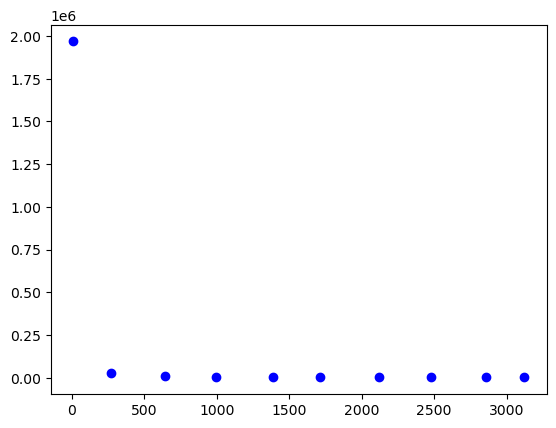

In [53]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


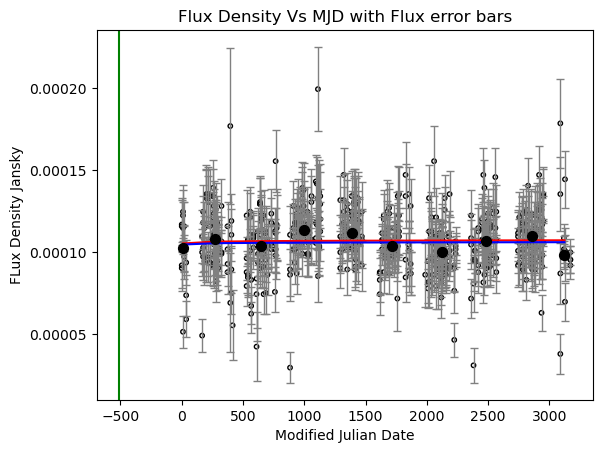

In [58]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x=52962 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [55]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [56]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



NameError: name 'func' is not defined

In [57]:
mase(actual,predicted1)

NameError: name 'predicted1' is not defined

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
